# Homework 8

<hr>

In [2]:
import numpy as np
import numba
import random
import matplotlib.pyplot as plt
import scipy.integrate

import seaborn as sns
sns.set(font_scale = 1.5, rc={"lines.linewidth":2})

## Problem 1 -- Simulating the full Buri experiment

Extend what we've done so far to model the entire Buri experiment, tracking 107 vials over 20 generations. For this, we will want to use a 2D-array, such as `red_freq = np.zeros([n_vials, n_generations])` to store our allele frequencies in. 

Plot the distribution of the red allele frequency at the end of the 20 generations as a histogram. It should look something like this: 

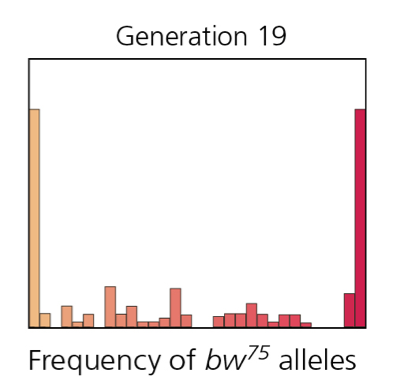

In [21]:
# number of flies in each vial
n_flies = 16

# number of generations to run the simulation
n_generations = 20

# number of vials in Buri's experiment
n_vials = 107

# initilaize an array to store the frequency of the red allele
r_freq = np.zeros([n_vials, n_generations])
r_freq[:,0] = 0.5

In [22]:
# loop over vials
for v in range(n_vials):
    # loop over time
    for g in range(1, n_generations):
        # use old red allele frequency to determine new red allele frequency
        p = r_freq[v ,g-1]
        num_red = np.random.binomial(n_flies*2, p) 
        r_freq[v, g] = num_red / (n_flies*2)

Text(0, 0.5, 'vial counts')

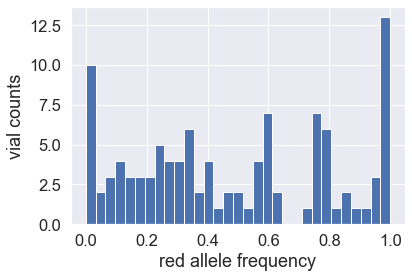

In [23]:
plt.hist(r_freq[:,-1], bins=31);
plt.xlabel("red allele frequency")
plt.ylabel("vial counts")

## Problem 2 -- Modifying the population size

Rerun your simulation for `n_flies = 8` and `n_flies = 32` and plot your results. From your results, how do population size and genetic drift relate? 

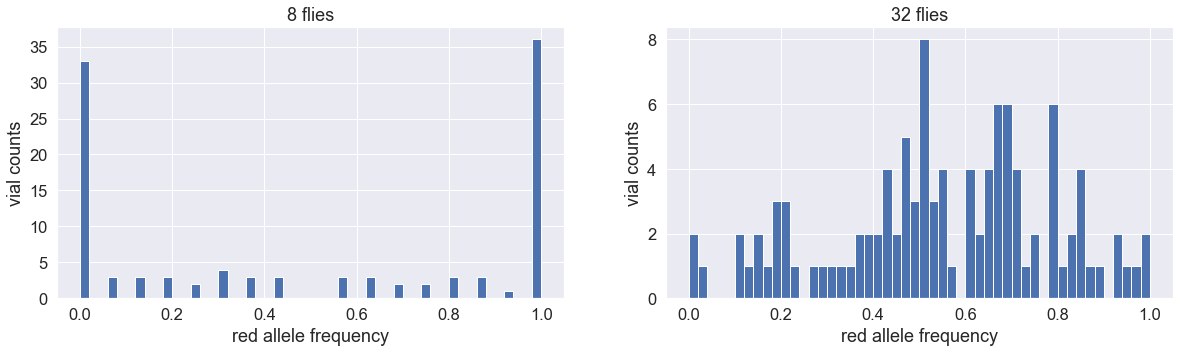

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

# number of flies in each vial
n_flies = 8

# loop over vials
for v in range(n_vials):
    # loop over time
    for g in range(1, n_generations):
        # use old red allele frequency to determine new red allele frequency
        p = r_freq[v ,g-1]
        num_red = np.random.binomial(n_flies*2, p) 
        r_freq[v, g] = num_red / (n_flies*2)

# plot results
ax[0].hist(r_freq[:,-1], bins=50);
ax[0].set_xlabel("red allele frequency")
ax[0].set_ylabel("vial counts")
ax[0].set_title("8 flies")

# number of flies in each vial
n_flies = 32

# loop over vials
for v in range(n_vials):
    # loop over time
    for g in range(1, n_generations):
        # use old red allele frequency to determine new red allele frequency
        p = r_freq[v ,g-1]
        num_red = np.random.binomial(n_flies*2, p) 
        r_freq[v, g] = num_red / (n_flies*2)

# plot results
ax[1].hist(r_freq[:,-1], bins=50);
ax[1].set_xlabel("red allele frequency")
ax[1].set_ylabel("vial counts")
ax[1].set_title("32 flies");

We see that the chance for fixation to occur is much higher with a smaller number of flies. On the left, with only 8 flies, around 60 of the vials have become fixed at either 0 or 1. With 32 flies however, only a few vials have become fixed.

## Problem 3 -- Modifying the number of generations

Returning to `n_flies = 16`, run the simulation for 100 generations and plot your results. From your results, what role does time seem to play in genetic drift?

Text(0, 0.5, 'vial counts')

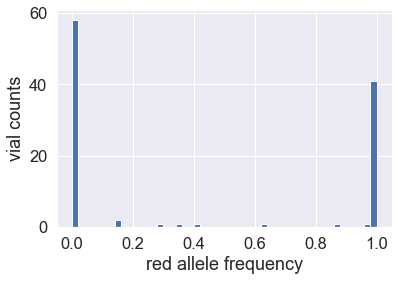

In [6]:
# number of flies in each vial
n_flies = 16

# number of generations to run the simulation
n_generations = 100

# initilaize an array to store the frequency of the red allele
r_freq = np.zeros([n_vials, n_generations])
r_freq[:,0] = 0.5

# loop over vials
for v in range(n_vials):
    # loop over time
    for g in range(1, n_generations):
        # use old red allele frequency to determine new red allele frequency
        p = r_freq[v ,g-1]
        num_red = np.random.binomial(n_flies*2, p) 
        r_freq[v, g] = num_red / (n_flies*2)
        
plt.hist(r_freq[:,-1], bins=50);
plt.xlabel("red allele frequency")
plt.ylabel("vial counts")

We see that if enough time has passed, the red or white allele becoming fixed in the population becomes much more certain. With 100 generations, all but a handful of vials have become fixed.

## Problem 4 -- Going beyond "bag of alleles"

So far we have assumed that all 32 alleles can be drawn with equal probability to make the next generation, but this ignores the fact that the alleles actually exist in discrete individuals and they can't be drawn quite that randomly. For this, we will construct a population as a list of lists, where each item in the list represents a fly, and the list of `0`s and `1`s represents which alleles that fly has. (`1` corresponds to the red allele and `0` corresponds to the white allele). The initial Buri population will look like this:

In [14]:
# 16 orange flies, each with a red (1) and white (0) aelele 
pop = np.array([[1,0]] * n_flies)
pop

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

Model this population over time, taking the following steps:

- Pick two flies at random from the population
- From each fly, pick an allele at random
- Use these two alleles to generate a new fly and save it as part of a new population
- Repeat this process `n_flies` times until you have produced a new population of 16 files
    
With this new population in hand, you can record the new frequency of the red allele and repeat the whole process again for 20 generations. Plot the frequency of the red allele over time for this vial. For now we won't worry about simulating this for 107 vials.

In [15]:
# number of flies in each vial
n_flies = 16

# number of generations to run the simulation
n_generations = 20

# initilaize an array to store the frequency of the red allele
r_freq = np.zeros(n_generations)
r_freq[0] = 0.5

# loop through generations
for g in range(1, n_generations):

    # initilize new population    
    new_pop = []

    # loop to construct new population of flies
    for i in range(len(pop)):

        # pick two numbers at random 
        num1, num2 = np.random.choice(range(len(pop)), 2, replace=False)

        # find the corrsponding flies
        fly1 = pop[num1]
        fly2 = pop[num2]

        # pick alleles at random from the two flies
        allele1 = random.choices(fly1)[0]
        allele2 = random.choices(fly2)[0]

        # generate new fly and add to population
        new_fly = [allele1, allele2]
        new_pop.append(new_fly)

    # update pop and compute red frequency
    pop = np.array(new_pop)
    r_freq[g] = pop.sum() / (n_flies*2)

(0.0, 1.0)

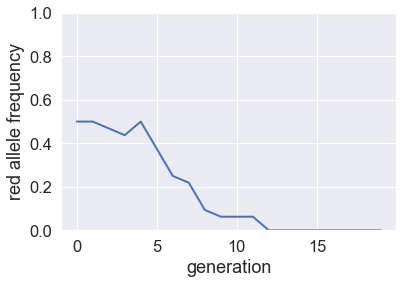

In [16]:
plt.plot(r_freq)
plt.xlabel("generation")
plt.ylabel("red allele frequency")
plt.ylim([0,1])